
# CSCE633 Spring 2021 (Total 100 pts)

**Machine Learning**

**Homework 2**

Instructor: Yoonsuck Choe

Feb 09, 2021


---



**Student name: ** Liu, Tian


---

# Common instructions (Read carefully)


**Submission:**

1. After you complete each section, "Save and pin" the revision. (**File -> Save and pin revision**). 
> There will be a 20-point penalty for not including revision history in the submission as instructed below.
2. When you're ready to submit, 
> 1. download the ipynb file (**File -> Download .ipynb**).
> 2. take screenshot of revision history, by comparing each successive pinned revisions (there will be several of these: final vs. latest pin, latest pin vs. previous pin, etc.). (**File -> Revision history**, then click on the radio buttons for pinned revisions to compare. Scroll down to the part that shows the major revised part, and take a screenshot. No need to show the entire revision history.)
> 3. submit a zip file **lastname-firstname.zip** containing the ipynb file and all revision screenshots.

**Using the markup language in the "text" boxes:**

Note: See https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0 for how to use the markdown when writing your answer in the text boxes.

**NEW: Including images/screenshots**

When including screenshots directly into the text cell, the markup source can get too long. To avoid this, you can upload your images to good drive, make them publicly viewable, get the share link, get the id string  from the link (for example, 1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy), and insert a tag like below:  
```
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy"> 
```


# Section I. Deterministic Case (total 60 points)

Consider the following reinforcement learning problem.


<figure>
<center>
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy" width="250">
<figcaption>Figure 1</figcaption></center>
</figure>



*   There are 12 states, and the actions are $\{ up, down, left, right \}$. Legal actions are those that go to the immediate neighbor, horizontally or vertically (but not diagonally). State $S_8$ is the goal state, and all actions here lead back to itself with reward 0.

*   The rewards for all action are 0, except for all actions that lead into $s_8$, which are 100 (as shown in the figure).

*   In all cases, assume $\gamma = 0.9$.

* Initially, all $Q(s,a) = 0$.




**Problem 1 (Written: 10pts):**

Consider the state action sequence of ($s_0$,right), ($s_1$, down), ($s_4$, down), ($s_7$, right), and suppose the $Q(s,a)$ values were updated during each move. 

(1) Starting with $Q(s,a)=0$ for all $(s,a)$, after one such pass, what would the resulting $Q(s,a)$ values be? 
* Note: Since one such pass has four actions, four $Q(s,a)$ values will be updated. 
* Note: Some values may be updated from 0 to 0, but this still counts as an update.  

(2) After two such passes, what would be the resulting $Q(s,a)$ values?

(3) After three such passes, what would be the resulting $Q(s,a)$ values?

(4) After four such passes, what would be the resulting $Q(s,a)$ values?


**Answer**

(1) Except $Q(s_7,right) = 100$, all other entries in the $Q(s,a)$ table are 0.

(2) Except $Q(s_7,right) = 100$, $Q(s_4,down) = 90$, all other entries in the $Q(s,a)$ table are 0.

(3) Except $Q(s_7,right) = 100$, $Q(s_4,down) = 90$, $Q(s_1,down) = 81$, all other entries in the $Q(s,a)$ table are 0.

(4) Except $Q(s_7,right) = 100$, $Q(s_4,down) = 90$, $Q(s_1,down) = 81$, $Q(s_0,right) = 72.9$, all other entries in the $Q(s,a)$ table are 0.

**Problem 2 (Written: 10pts):**

(1) Manually compute the optimal $V^*(s)$ for all states $s_0, s_1, ... s_{11}$. See slide04-rl.pdf, page 14. 

* The optimal policy $\pi^*$ is pretty straight-forward: Action that takes you to the next state that is one of the shortest path to the goal state (there could be one, or two or more such paths, depending on yout start state). 

* It is best if you start from $s_8$ and work backward: s_8, then all states that can reach s_8 in one move (they are $s_5, s_7$, and $s_{11}$), then all states that can reach s_8 in two moves, etc. 

* Hint: based on how many moves a state $s$ is away from the goal state, $V^*(s)$ has a form of $0 + \gamma 0 + \gamma^2 0 + \gamma^3 100 + \gamma^4 0 + ... = 0 + 0 + 0 + \gamma^3 100 + 0 + 0 + ... = \gamma^3 100 = 0.9^3 * 100 = 72.9$ (in case of four moves).  

(2) Manually compute the optimal $Q(s,a)$ for all $(s,a)$. See slide04-rl.pdf, page 26. You can quickly and directly compute this from $V^*(s)$ above. No need to recursively evaluate $Q(s,a)$. 

* Note: $Q(s,a) = r(s,a) + \gamma V^*(\delta(s,a))$



**Answer**

(1)
For the goal state $S_8$:  
$V^*(S_8) = 0 + \gamma 0 + \gamma^2 0 + ... = 0$  

For states that can reach $S_8$ in 1 step:  
$V^*(S_5) = 100 + \gamma 0 + \gamma^2 0 + ... = 100$  
$V^*(S_7) = 100 + \gamma 0 + \gamma^2 0 + ... = 100$  
$V^*(S_{11}) = 100 + \gamma 0 + \gamma^2 0 + ... = 100$  

For states that can reach $S_8$ in 2 steps:  
$V^*(S_{2}) = 0 + \gamma 100 + \gamma^2 0 + \gamma^3 0 + ... = 90$  
$V^*(S_{4}) = 0 + \gamma 100 + \gamma^2 0 + \gamma^3 0 + ... = 90$  
$V^*(S_{6}) = 0 + \gamma 100 + \gamma^2 0 + \gamma^3 0 + ... = 90$  
$V^*(S_{10}) = 0 + \gamma 100 + \gamma^2 0 + \gamma^3 0 + ... = 90$  

For states that can reach $S_8$ in 3 steps:  
$V^*(S_{1}) = 0 + \gamma 0 + \gamma^2 100 + \gamma^3 0 + ... = 81$  
$V^*(S_{3}) = 0 + \gamma 0 + \gamma^2 100 + \gamma^3 0 + ... = 81$  
$V^*(S_{9}) = 0 + \gamma 0 + \gamma^2 100 + \gamma^3 0 + ... = 81$

For states that can reach $S_8$ in 4 steps:  
$V^*(S_{0}) = 0 + \gamma 0 + \gamma^2 0 + \gamma^3 100 + ... = 72.9$  

(2)   
$Q(s,a)$ table:

> States | up  | down | left | right
> ---    | --- | ---  | ---  | --- 
> s0     | -1  | 72.9 | -1   | 72.9
> s1     | -1  | 81   |65.61 | 81
> s2     | -1  | 90   | 72.9 | -1
> s3     |65.61| 81   | -1   | 81
> s4     |72.9 | 90   | 72.9 | 90
> s5     | 81  | 100  | 81   | -1
> s6     |72.9 | 72.9 | -1   | 90
> s7     |81   | 81   | 81   | 100
> s8     | 0   | 0    | 0    | 0
> s9     | 81  | -1   | -1   | 81
> s10    | 90  | -1   | 72.9 | 90
> s11    | 100 | -1   | 81   | -1

**Problem 3 (Program: 20 pts):**

Modify the fully functioning Q-learning algorithm in the code cell below, to learn the $Q(s,a)$ values for the above
example (Figure 1). Use the algorithm in slide04-rl.pdf, Page 22. Note: There are slight differences between the slide and the fully functioning code below. use the code below as the definitive reference. 

* You have to find out what stopping criterion to use. The code below shows a fixed number of iterations. Change it to something that measures convergence. For exmple, observe the sum of difference in the entire $Q$ table from step $n-1$ to step $n$: $\sum_{s,a \in S,A} | Q_n(s,a) - Q_{n-1}(s,a)|$, and stop when the difference drops below a certain level (try 0.01 first, and lower or raise it). You have to find this out empirically.
* Use a random policy to select action $a$ given current random state $s$ (note: this is also different from the slide). You will find that this can be achieved by just setting a certain simulation parameter.

(1) Directly modify the code below.

(2) Show resulting Q table ($12 \times 4$ matrix).

* Rows represent states and columns represent actions.
* Row ordering should be $s_0, s_1, s_2, ... , s_{11}$, from top to bottom.
* Column ordering should be $up, down, left, right$, from left to right. 
* **Note: do not change the above ordering! You will be penalized if you do so.**
* Set (s,a) of Q and other matrices to $-1$ to mark illegal moves. 

(3) Write a new function to compute the $V(s)$ values for all $s_0, s_1, ... , s_{11}$, from the resulting $Q(s,a)$ values. Print the $V(s)$ values in the layout of Figure 1. 

(4) Show a plot showing the running average of $\sum_{s,a \in S,A} | Q_{t+1}(s,a) - Q_t(s,a)|$ over the iterations.

(5) Compare the outcomes above with the V values and the Q table you manually calculated in problem 2.

*). Note: This problem is mostly an exercise of just changing the environment (state transition matrix, and the reward matrix, according to Figure 1). Most of the requirement above, including the Q-table print out, computing the running average of difference in Q over time, and the plotting of the running average are already in the code. Read the instructions at the top of the code cell below, and try running it with different parameters to get your self familiarized with the code. Then change the "Environment set up" section where it is marked with "modify". The only real code you need to write is to write the function for computing $V(s)$. 


**Answer**  
(1) see the implementation of code below.  
(2)(3) Q and V are printed in the output.  
(4) see the plot below.  
(5) the V and Q calculated by the code are matching with the manually calculated in problem 2.





Delta
     up  down  left  right
s0   -1     3    -1      1
s1   -1     4     0      2
s2   -1     5     1     -1
s3    0     6    -1      4
s4    1     7     3      5
s5    2     8     4     -1
s6    3     9    -1      7
s7    4    10     6      8
s8    8     8     8      8
s9    6    -1    -1     10
s10   7    -1     9     11
s11   8    -1    10     -1


Reward
      up  down  left  right
s0    -1     0    -1      0
s1    -1     0     0      0
s2    -1     0     0     -1
s3     0     0    -1      0
s4     0     0     0      0
s5     0   100     0     -1
s6     0     0    -1      0
s7     0     0     0    100
s8     0     0     0      0
s9     0    -1    -1      0
s10    0    -1     0      0
s11  100    -1     0     -1


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0   -1.0
s3   0.0   0.0  -1.0    0.0
s4   0.0   0.0   0.0    0.0
s5   0.0   0.0   0.0   -1.0
s6   0.0   0.0  -1.0    0.0
s7   0.0   0.0   0.0    0.0
s8 

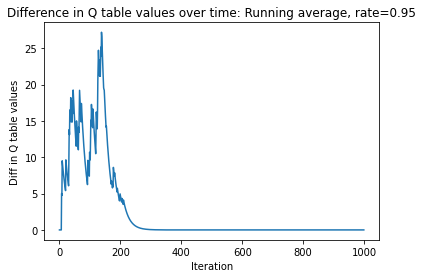

diff in Q reached below 0.01 at iteration = 328

V_optimal is (in Figure 1 layout):
[[ 72.9  81.   90. ]
 [ 81.   90.  100. ]
 [ 90.  100.    0. ]
 [ 81.   90.  100. ]]


In [ ]:
#!/usr/bin/python

# qlearn.py : simple discrete, deterministic Q-learning 
#
# Requires: numpy, pandas, matplotlib
#
# Yoonsuck Choe
# choe@tamu.edu
#
# 2021. 02. 17. (wed) 09:00:58 KST
# 2021. 02. 18. (thu) 00:09:00 KST
#
# Getting started:
# 
# - pick between "console" mode (for command line) or "notebook" mode (for colab, etc). 
#     See the config section.
# 
#     mode  = "console"
#
# Suggested experiments:
#
# - change epsilon: 
#     0.1, 0.25, 0.5 (default), 0.8, 1.0 and see how the Q diff plot looks like (how fast 
#     learning converges.
#    
#     ./qlearn.pl --epsilon=0.25 
#
#     or, for notebook mode
# 
#     args.epsilon = 0.25
#     qlearn()
# 
# - change alpha: 
#     0.1, 0.25, 0.5, 0.8, 1.0 (default) and see how the Q diff plot looks like (how fast 
#     learning converges.
# 
#     ./qlearn.pl --alpha=0.25 
# 
#     or, for notebook mode
# 
#     args.alpha= 0.25
#     qlearn()
# 
# - try a new grid world environment (change section below "Environment set up".
#     search for "modify"
#
#

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode="console"
mode="notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="greedy policy")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration?")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 1.0
    self.gamma = 0.9
    self.epsilon = 0.5
    self.num_iter = 1000
    self.run_avg_rate = 0.95
    self.tol = 0.01
    self.display_flag = "True"

#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of abs difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#--------------------
# get optimal V from final Q
#--------------------
def get_optimalV(Q):
  sz = len(Q)
  V_optimal = np.zeros(sz)
  
  for i in range(sz):
    V_optimal[i] = Q.iloc[i,:].max()
  return V_optimal

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 s2
# s3 s4 s5 
# s6 s7 (s8)
# s9 s10 s11
# 
#   * (s5,down), (s11, up), and (s7,right) has reward 100, all others are 0.
#   * All actions in s8 lead back to s8, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s10", "s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{                 # for each s  0  1  2  3  4  5  6  7  8  9  10 11
 	  "up"   : pd.Series(np.array([-1,-1,-1, 0, 1, 2, 3, 4, 8, 6, 7, 8]),index=s_index),
	  "down" : pd.Series(np.array([ 3, 4, 5, 6, 7, 8, 9,10, 8,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 1,-1, 3, 4,-1, 6, 8,-1, 9, 10]),index=s_index),
	  "right": pd.Series(np.array([ 1, 2,-1, 4, 5,-1, 7, 8, 8,10,11,-1]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{                 # for each s  0  1  2  3  4  5  6  7  8  9  10 11
	  "up"   : pd.Series(np.array([-1,-1,-1, 0, 0, 0, 0, 0, 0, 0, 0, 100]),index=s_index),
	  "down" : pd.Series(np.array([ 0, 0, 0, 0, 0,100,0, 0, 0,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 0,-1, 0, 0, -1,0, 0,-1, 0, 0]),index=s_index),
	  "right": pd.Series(np.array([ 0, 0,-1, 0, 0,-1, 0,100,0, 0, 0, -1]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 8

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------

def qlearn(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>=0).astype(int)-1
  #print("\n\nvisits:")
  #print(visits)

  run_avg = 1
  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>=0).astype(float)-1 

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)

  n = 0 
  while run_avg > args.tol or n < 50:
  #for n in range(args.num_iter):
    
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
  
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
  
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
  
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
  
    #----------
    # 3. train
    #----------
  
    visits.iloc[s,a] = visits.iloc[s,a]+1

    alpha = args.alpha
    gamma = args.gamma
  
    # 3.1 find next state from (s,a)
  
    s_next = delta.iloc[s,a]
  
    # 3.2 update Q
  
    # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
    Q.iloc[s,a] = (1.0-alpha)*Q.iloc[s,a] + alpha*(reward.iloc[s,a] + gamma*Q.iloc[s_next,:].max())
  
  
    # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
    if n == 0: 
      run_avg = 0

    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)
    n += 1 
   
    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n-1))
      print(Q)
      print("diff = "+str(d[n-1]))

    #if (n>50  and run_avg < 0.01):
 
    #    break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)
  
  print("\nFinal visit count table\n")
  print(visits)
  
  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d)
  plt.show()

  print("diff in Q reached below 0.01 at iteration = "+str(n-1))

  #--------------------
  # (5) calculate V(s) based on final Q
  #--------------------
  V_optimal = get_optimalV(Q)
  V_optimal = V_optimal.reshape(4,3)
  print("\nV_optimal is (in Figure 1 layout):")
  print(V_optimal)


#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "False"  # Set this to "True" to see the changing Q table over time.
args.epsilon = 1.0
qlearn()

# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1. 

In [ ]:
# You can also easily run a different experiment in its own code cell, like below,
# with a different set of parameters

args.epsilon=0.2
qlearn()

**Problem 4 (Program: 10 pts):**

Experiment with the $\epsilon$-greedy policy. You don't need to change any code. Just change the parameter and run qlearn(). 

Test with different $\epsilon$ values to see how the $\epsilon$-greedy policy behaves. For example, $\epsilon \in {0.0, 0.1, 0.3, 0.5, 0.8, 0.9, 1.0}$. Note: $\epsilon = 0.0$ is the greedy policy and $\epsilon = 1.0$ is the random policy. ($\epsilon$-greedy chooses the greedy move with $(1-\epsilon)$ probability.).

(1) Which $\epsilon$ value tend to converge fastest? For each $epsilon$ value, you can run multiple runs (say 5 times) and observe how long it too to converge, and take an average. You can then compare the average. 

(2) How does the number of visits table differ for different $\epsilon$ values? Based on this, how do you think $epsilon$ affects exploration vs. exploitation? 

(3) Did some $\epsilon$ value lead the algorithm not converging (the final Q table is different from the manually calculated table from Problem 2)? If so, why do you think it did not converge? 


**Answer**

Run your experiments in the code cell below. 

(1) Each $\epsilon$ value is run for 5 times, and the average number of iterations to reach convergence are compared. Results show that $\epsilon=0.9$ converges fastest. The detailed results are shown in the table below. For $\epsilon = 0$ case, the iterations were terminated earlier but all the final Q solution are incorrect. For $\epsilon = 0.1$ and $0.2$ or $0.3$ case, sometimes it also terminated earlier with incorrect final $Q$.

> $\epsilon$ | converge iterations (5 runs) | avg  | note  
> ---        | ---                 | ---  | --- 
> 0          | 138x 147x 161x 127x 122x   | All Q are incorrect  | x means final Q is not correct
> 0.1     | 125x 224 914 921 669  |  682  | 1 out of 5 are incorrect
> 0.2     | 492 678 139x 130x 908 |  692  | 2 out of 5 are incorrect
> 0.3     | 314 431x 594 569 623  | 531 | 1 out of 5 are incorrect
> 0.4     | 683 490 495 422 478   | 513   | 
> 0.5     | 378 461 382 470 638   | 465  | 
> 0.6     | 377 315 380 419 346   | 367 |   
> 0.7     | 389 353 446 430 445   | 412  |    
> 0.8     | 377 351 428 392 425   | 394    | 
> 0.9     | 272 316 275 274 341  | 295   |   Fastest
> 1.0    | 393 313 323 273 303   | 321   |   

(2) Small $\epsilon$ values leads more zeros and more concentrated values in the visit table, i.e. less $(s,a)$ pairs were visited. On the contrary, large $\epsilon$ values result in much less zeros and more spreaded values in the visit table, i.e. more $(s,a)$ pairs were visited more evenly. Thus, large $\epsilon$ means more random search, i.e. more exploration. And small $\epsilon$ controls more greedy search, i.e. more exploitation.

(3) As shown in the table above, when $\epsilon = 0$, the algorithm is not converging. And when $\epsilon = 0.1\ or\ 0.2\ or\ 0.3 $, the algorithm is not converging some times as well. This is because small $\epsilon$ results in strong greedy search in each iteration. And initially, the Q table is mostly 0 and -1. Taking the greedy action (taking the action with largest $Q(s,a)$ value) will always take the first action with 0 in the Q table. So after several iterations, only few $(s,a)$ paris were visited and updated. This constraints the algorithm to visit different $(s,a)$ pairs, leading to not converging or converging to incorrect solution.




Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0   -1.0
s3   0.0   0.0  -1.0    0.0
s4   0.0   0.0   0.0    0.0
s5   0.0   0.0   0.0   -1.0
s6   0.0   0.0  -1.0    0.0
s7   0.0   0.0   0.0    0.0
s8   0.0   0.0   0.0    0.0
s9   0.0  -1.0  -1.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up  down  left  right
s0    -1.0   0.0  -1.0    0.0
s1    -1.0   0.0   0.0    0.0
s2    -1.0   0.0   0.0   -1.0
s3     0.0   0.0  -1.0    0.0
s4     0.0   0.0   0.0    0.0
s5     0.0   0.0   0.0   -1.0
s6     0.0   0.0  -1.0    0.0
s7     0.0   0.0   0.0    0.0
s8     0.0   0.0   0.0    0.0
s9     0.0  -1.0  -1.0    0.0
s10    0.0  -1.0   0.0    0.0
s11  100.0  -1.0   0.0   -1.0

Final visit count table

     up  down  left  right
s0   -1    18    -1      1
s1   -1    14     1      0
s2   -1     4     1     -1
s3   11     0    -1      1
s4   11     0     0      0
s5    8     0     0     -1
s6

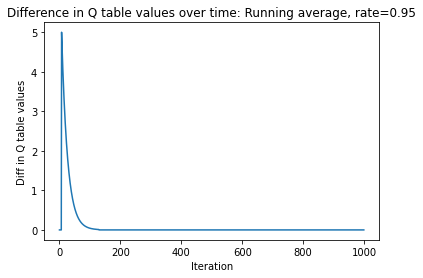

diff in Q reached below 0.01 at iteration = 129

V_optimal is (in Figure 1 layout):
[[  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0. 100.]]


In [ ]:
# You can quickly run multiple experiments without modifying the code above or copying and pasting the whole code. Just do something like this. Create a new code cell for a different experiment.

# Q=(delta>0).astype(float)-1.0 + (delta>0)*np.random.rand(6,4)*0.001   # add small initial random value to break the tie 
args.display_flag = "False"
args.epsilon = 0.1
qlearn()

**Answer:**


**Problem 5 (Programming: 10)**

Copy and paste the code in Problem 3, and change it to implement SARSA($\lambda$). You have to make sure you implement the eligibility trace correctly. 

Once you're done implementing, run a few experiments to determine whether the original Q learning in Problem 3 works faster, or if the SARSA($\lambda$) algorithm works faster (faster to converge, given the same parameter conditions). The results may vary. Please write a detailed description of you experiment and results, and whether you find the more sophisticated SARSA($\lambda$) to be faster to converge. 


**Answer**  
The origional Q learning and the SARSA($\lambda$) are compared as shown in the code cells below. The SARSA($\lambda$) are ran for multiple times to find the best parameters for it to converge and get closely correct $Q$. The found parameters are the following:
```
args.epsilon = 0.2  
args.alpha = 0.05  
args.lamda = 0.9  
args.gamma = 0.9  
args.num_iter = 10000
args.run_avg_rate = 0.99
args.tol = 0.1
```
The Q learning used the same parameters except $args.alpha = 1$. If using the same small $alpha = 0.05$ as in the $SARSA(\lambda) $, the Q learning will terminate with few iterations due to the small update at each step. Thus, $alpha =1$ is used for Q learning to get correct $Q$.   

The results show that the Q learning converged after 1149 iterations as shown below. However, the $SARSA(\lambda)$ stopped only after reaching the max number of iterations (10000). This is because that at each move, all the $Q(s,a)$ pairs along the same trace are updated, causing the difference in Q tables hard to meet the stopping/converging criteria. The $Q$ output by $SARSA(\lambda)$ does not exactly equal to the $Q$ as gernerated by the origonal Q learning, but approximately correct.

Thus, for this problem, the $SARSA(\lambda)$ is not converging faster than the origional Q learning algorithm. Probably it is because this is a small problem with simple $Q$ table and short traces. In more complicated problems with large $Q$ table and longer traces, I believe that $SARSA(\lambda)$ would perform better than the origional Q learning. 






Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0   -1.0
s3   0.0   0.0  -1.0    0.0
s4   0.0   0.0   0.0    0.0
s5   0.0   0.0   0.0   -1.0
s6   0.0   0.0  -1.0    0.0
s7   0.0   0.0   0.0    0.0
s8   0.0   0.0   0.0    0.0
s9   0.0  -1.0  -1.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

         up   down   left  right
s0    -1.00   72.9  -1.00   72.9
s1    -1.00   81.0  65.61   81.0
s2    -1.00   90.0  72.90   -1.0
s3    65.61   81.0  -1.00   81.0
s4    72.90   90.0  72.90   90.0
s5    81.00  100.0  81.00   -1.0
s6    72.90   72.9  -1.00   90.0
s7    81.00   81.0  81.00  100.0
s8     0.00    0.0   0.00    0.0
s9    81.00   -1.0  -1.00   81.0
s10   90.00   -1.0  72.90   90.0
s11  100.00   -1.0  81.00   -1.0

Final visit count table

      up  down  left  right
s0    -1    46    -1     38
s1    -1    83     3     32
s2    -1    89    12     -1
s3    38    45    -1     19
s4    45    

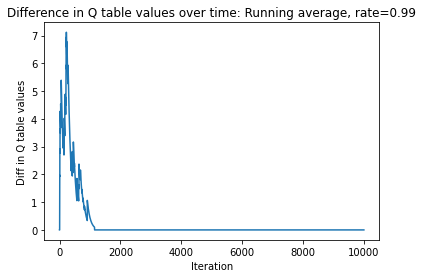

diff in Q reached below 0.01 at iteration = 1149

V_optimal is (in Figure 1 layout):
[[ 72.9  81.   90. ]
 [ 81.   90.  100. ]
 [ 90.  100.    0. ]
 [ 81.   90.  100. ]]


In [ ]:
# run the origional Q learn with the same parameters as SARSA(lambda)
args.display_flag = "False"
args.epsilon = 0.2
args.alpha = 1
args.gamma = 0.9
args.run_avg_rate = 0.99
args.num_iter = 10000
args.tol =0.1

qlearn()



Delta
     up  down  left  right
s0   -1     3    -1      1
s1   -1     4     0      2
s2   -1     5     1     -1
s3    0     6    -1      4
s4    1     7     3      5
s5    2     8     4     -1
s6    3     9    -1      7
s7    4    10     6      8
s8    8     8     8      8
s9    6    -1    -1     10
s10   7    -1     9     11
s11   8    -1    10     -1


Reward
      up  down  left  right
s0    -1     0    -1      0
s1    -1     0     0      0
s2    -1     0     0     -1
s3     0     0    -1      0
s4     0     0     0      0
s5     0   100     0     -1
s6     0     0    -1      0
s7     0     0     0    100
s8     0     0     0      0
s9     0    -1    -1      0
s10    0    -1     0      0
s11  100    -1     0     -1


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0   -1.0
s3   0.0   0.0  -1.0    0.0
s4   0.0   0.0   0.0    0.0
s5   0.0   0.0   0.0   -1.0
s6   0.0   0.0  -1.0    0.0
s7   0.0   0.0   0.0    0.0
s8 

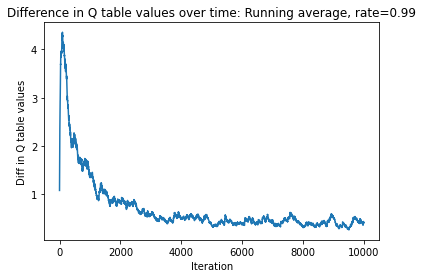

diff in Q reached below 0.01 at iteration = 9999

V_optimal is (in Figure 1 layout):
[[ 68.44208074  78.62768979  87.72266905]
 [ 76.40660764  88.23451355 100.        ]
 [ 86.76760834 100.           0.        ]
 [ 79.44841612  89.3912172  100.        ]]


In [ ]:
# SARSA(lambda)


#!/usr/bin/python

# qlearn.py : simple discrete, deterministic Q-learning 
#
# Requires: numpy, pandas, matplotlib
#
# Yoonsuck Choe
# choe@tamu.edu
#
# 2021. 02. 17. (wed) 09:00:58 KST
# 2021. 02. 18. (thu) 00:09:00 KST
#
# Getting started:
# 
# - pick between "console" mode (for command line) or "notebook" mode (for colab, etc). 
#     See the config section.
# 
#     mode  = "console"
#
# Suggested experiments:
#
# - change epsilon: 
#     0.1, 0.25, 0.5 (default), 0.8, 1.0 and see how the Q diff plot looks like (how fast 
#     learning converges.
#    
#     ./qlearn.pl --epsilon=0.25 
#
#     or, for notebook mode
# 
#     args.epsilon = 0.25
#     qlearn()
# 
# - change alpha: 
#     0.1, 0.25, 0.5, 0.8, 1.0 (default) and see how the Q diff plot looks like (how fast 
#     learning converges.
# 
#     ./qlearn.pl --alpha=0.25 
# 
#     or, for notebook mode
# 
#     args.alpha= 0.25
#     qlearn()
# 
# - try a new grid world environment (change section below "Environment set up".
#     search for "modify"
#
#

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode="console"
mode="notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="greedy policy")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration?")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 0.05
    self.lamda = 0.9
    self.gamma = 0.9
    self.epsilon = 1.0
    self.num_iter = 10000
    self.run_avg_rate = 0.9
    self.tol = 0.01
    self.display_flag = "True"

#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of abs difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#--------------------
# get optimal V from final Q
#--------------------
def get_optimalV(Q):
  sz = len(Q)
  V_optimal = np.zeros(sz)
  
  for i in range(sz):
    V_optimal[i] = Q.iloc[i,:].max()
  return V_optimal

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 s2
# s3 s4 s5 
# s6 s7 (s8)
# s9 s10 s11
# 
#   * (s5,down), (s11, up), and (s7,right) has reward 100, all others are 0.
#   * All actions in s8 lead back to s8, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s10", "s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{                 # for each s  0  1  2  3  4  5  6  7  8  9  10 11
 	  "up"   : pd.Series(np.array([-1,-1,-1, 0, 1, 2, 3, 4, 8, 6, 7, 8]),index=s_index),
	  "down" : pd.Series(np.array([ 3, 4, 5, 6, 7, 8, 9,10, 8,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 1,-1, 3, 4,-1, 6, 8,-1, 9, 10]),index=s_index),
	  "right": pd.Series(np.array([ 1, 2,-1, 4, 5,-1, 7, 8, 8,10,11,-1]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{                 # for each s  0  1  2  3  4  5  6  7  8  9  10 11
	  "up"   : pd.Series(np.array([-1,-1,-1, 0, 0, 0, 0, 0, 0, 0, 0, 100]),index=s_index),
	  "down" : pd.Series(np.array([ 0, 0, 0, 0, 0,100,0, 0, 0,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 0,-1, 0, 0,-1, 0, 0,-1, 0, 0]),index=s_index),
	  "right": pd.Series(np.array([ 0, 0,-1, 0, 0,-1, 0,100,0, 0, 0, -1]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 8

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------

def qlearn_sarsa_l(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>=0).astype(int)-1
  #print("\n\nvisits:")
  #print(visits)

  run_avg = 1
  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>=0).astype(float)-1 

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)

  n = 0 
  while (run_avg > args.tol or n < 50) and n< args.num_iter :
  #for n in range(args.num_iter):
    
    # reset the eligibility trace table to 0 for each episod
    E = pd.DataFrame(
      {                 # for each s  0  1  2  3  4  5  6  7  8  9  10 11
        "up"   : pd.Series(np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),index=s_index),
        "down" : pd.Series(np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),index=s_index),
        "left" : pd.Series(np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),index=s_index),
        "right": pd.Series(np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),index=s_index)
      }
    )

    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
    
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
  
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
  
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
  
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
  
    while s != goal: # keep seaching until reaching goal state
      #----------
      # 3. train
      #----------
    
      visits.iloc[s,a] = visits.iloc[s,a]+1

      alpha = args.alpha
      gamma = args.gamma
    
      # 3.1 find next state from (s,a)
    
      s_next = delta.iloc[s,a]

      # pick next action a_next based on greedy policy
      if (random.random() < (1-args.epsilon)):  
        # greedy action:
        a_next = Q.iloc[s_next,:].argmax()
      else:
        # random action
        a_next = random.randint(0,num_actions-1)
  
      while (delta.iloc[s_next,a_next]==-1): # avoid invalid action
        a_next = random.randint(0,num_actions-1)
      
      dlta = reward.iloc[s,a] + gamma*Q.iloc[s_next,a_next] - Q.iloc[s,a]
      E.iloc[s,a] = 1
   
      # update all (s,a) based on Eglibility trace
      alpha = args.alpha
      lamda = args.lamda
      for ss in range(len(Q)):
        for aa in range(num_actions): 
          if E.iloc[ss,aa] != 0:
            #Q.iloc[ss,aa] += np.power(0.9,n)*alpha*dlta*E.iloc[ss,aa]
            Q.iloc[ss,aa] += alpha*dlta*E.iloc[ss,aa]
            E.iloc[ss,aa] *= gamma*lamda
      
      s = s_next
      a = a_next    
  
      # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
      #Q.iloc[s,a] = (1.0-alpha)*Q.iloc[s,a] + alpha*(reward.iloc[s,a] + gamma*Q.iloc[s_next,:].max())
      
      # end of one trace
    
    # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
    if n == 0: 
      tun_avg = 0
      
    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)

    n += 1 
   
    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n-1))
      print(Q)
      print("diff = %f" % d[n-1])
      #if n ==100:
      #  stop
      #print('Visit')
      #print(visits)
      #print("run_avg = "+str(d[n-1]))

    #if (n>50  and run_avg < 0.01):
 
    #    break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)
  
  print("\nFinal visit count table\n")
  print(visits)
  
  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d)
  plt.show()

  print("diff in Q reached below 0.01 at iteration = "+str(n-1))

  #--------------------
  # (5) calculate V(s) based on final Q
  #--------------------
  V_optimal = get_optimalV(Q)
  V_optimal = V_optimal.reshape(4,3)
  print("\nV_optimal is (in Figure 1 layout):")
  print(V_optimal)


#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "False"  # Set this to "True" to see the changing Q table over time.
args.epsilon = 0.2
args.alpha = 0.05
args.lamda = 0.9

args.gamma = 0.9
args.num_iter = 10000
args.run_avg_rate = 0.99
args.tol = 0.1

qlearn_sarsa_l()

# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1. 

# Section II. Stochastic Case (total 40 points)

Consider a stochastic version of the reinforcement learning problem posed in Section 1 (figure copie below). Modify the rules so that:

* $\delta(s,a)$ is stochastic: The probability of landing in the intended direction is $0.70$. The probability of landing in one of $n$ unintended legal direction is $\frac{0.30}{n}$.

  * Example 1 : If you are in $s_0$ and action $a$ was $right$, probability of landing in $s_1$ is 0.70, and ending up in $s_3$ u=is 0.3.

  * Example 2: If you are in $s_1$ and $a$ was $down$, probability of landing in $s_4$ is 0.70, ending up in $s_0$ is 0.15 (= 0.3/2), and ending up in $s_2$ is 0.15 (= 0.3/2).

  * Example 3: If you are in $s_4$ and $a$ was $left$, probability of landing in $s_3$ is 0.70, ending up in $s_1$ is 0.1 (= 0.3/3), ending up in $s_5$ is 0.1 (= 0.3/3), and ending up in $s_7$ is 0.1 (= 0.3/3)

* Reward $r(s,a)$ depends on where you landed based on the above. All rewards are 0 unless the resulting state was the goal state $s_8$. For example, if you were in $s_7$ and the action was $a=up$, with 10\% chance you will land in $s_8$, the goal state. In this case $r(s_7, up) = 100$ for that specific run. In a different run, with the same action $up$, if you landed in $s_{10}$, then $r(s_7,up) = 0$. Note that $r(s_7,up)$ can be either 0 or 100, depending on the random outcome.

<figure>
<center>
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy" height="450px"> &nbsp;&nbsp;&nbsp; &nbsp;<img 
 src="https://drive.google.com/uc?export=view&id=1aGu78DvllvjaDghW7fzNK7uOPeBmebyN" height="450px"> 
<figcaption>Figure 2: Left = same as Figure 1, Right = stochastic behavior </figcaption></center>
</figure>





**Problem 7 (Written: 10 pts):**

Compute $E[r(s_7,up)]$ by hand, given the above info (Figure 2, and the description).

$E[\cdot]$ is the expected value operator. $E[X] = \sum_{i=0}^n x_i p_i $, where $X$ is a random variable, $x_i$ ($i=0 .. n$) is a value $X$ can take, and $p_i$ is the probability of observing $x_i$.  

So, to compute $E[r(s_7,up)]$, you need to find all possible reward values ($x_i$) and their probabilities ($p_i$), then plug it into the above equation. See Figure 2 (right) to find these values.






**Answer**:  
$E[r(s_7,up)] = sum_{i=0}^n r_i p_i = 0*0.7 + 100*0.1 + 0*0.1 + 0*0.1 = 10$ 


**Problem 8 (Program: 20 pts):**

Modify the program in problem 3, so that the environment acts stochastically, as defined in the beginning of section II. 

The learning rule has to be modified to the one shown in slide04-rl.pdf, page 35. 

> $\hat{Q}_n(s,a) \leftarrow (1-\alpha_n) \hat{Q}_{n-1}(s,a) + \alpha_n \left[ r + \gamma \max_{a'} \hat{Q}_{n-1}(s',a') \right],$ 
> 
> where $\alpha_n = \frac{1}{1+visits_s(s,a)}$

(1) Modify the code from problem 3.

(2) Run the experiment, and show the resulting $Q$ table. You should experiment with the $\alpha$ parameter to get the correct result. Use the random policy. $\gamma = 0.9$, as usual.  

(3) Set up another table Sum_Ersa to compute the sum of all reward you observed when visiting the $(s,a)$ pairs. This table should be the same size as the Q table. When a specific state action pair is visited ($(s,a)$ is "visited", when $s$ and $a$ are randomly generated in the main loop, to update $Q(s,a)$), say $(s_4, right)$, observe the reward ($r$), and add it to the appropriate Sum_Ersa location:
```
Sum_Ersa.iloc[5,3] = r + Sum_Ersa.iloc[5,3]    # Note: (index of s4 is 5, and index of right is 3)
```
or
```
Sum_Ersa.loc["s4","right"] = r + Sum_Ersa.loc["s4","right"]    # Using loc, instead of iloc.
```
Finally, after your training terminates, compute an estimate of $E[r(s,a)]$, based on the Sum_Ersa  table and the visits table (this visits table is already implemented). 

> $E[r(s,a)] \sim \frac{\sum_{\forall \mbox{visits to } (s,a)} (\mbox{observed  reward }, r)}{\mbox{visits}(s,a)}$

Store the results in a table named:
```
Ersa
```

Print out the results.

(4) Compare $E[r(s_7,up)]$ with the manually computed value from Problem 7. Are they comparable?


**Answer:**

(1) Please see the implementation in the code cell below.

(2) Please see the final Q table in the output of the following cell code.

(3) Sum_Ersa and Ersa are both printed out in the output below.

(4) From the output Ersa table, $E[r(s_7,up)]=10.21$, which is comparable to the manually calculated value of $10$ in Problem 7 above.





Delta
     up  down  left  right
s0   -1     3    -1      1
s1   -1     4     0      2
s2   -1     5     1     -1
s3    0     6    -1      4
s4    1     7     3      5
s5    2     8     4     -1
s6    3     9    -1      7
s7    4    10     6      8
s8    8     8     8      8
s9    6    -1    -1     10
s10   7    -1     9     11
s11   8    -1    10     -1


Reward
      up  down  left  right
s0    -1     0    -1      0
s1    -1     0     0      0
s2    -1     0     0     -1
s3     0     0    -1      0
s4     0     0     0      0
s5     0   100     0     -1
s6     0     0    -1      0
s7     0     0     0    100
s8     0     0     0      0
s9     0    -1    -1      0
s10    0    -1     0      0
s11  100    -1     0     -1


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0   -1.0
s3   0.0   0.0  -1.0    0.0
s4   0.0   0.0   0.0    0.0
s5   0.0   0.0   0.0   -1.0
s6   0.0   0.0  -1.0    0.0
s7   0.0   0.0   0.0    0.0
s8 

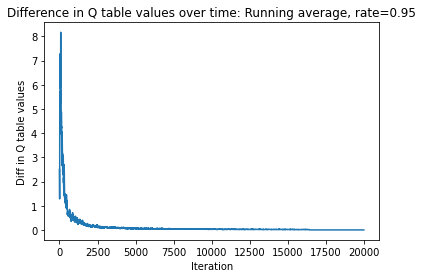

diff in Q reached below 0.01 at iteration = 16411

V_optimal is (in Figure 1 layout):
[[45.60077861 55.70092793 66.83523115]
 [54.38087051 70.25900548 87.47073937]
 [67.85072388 88.55173504  0.        ]
 [61.72195338 75.63880595 90.04526256]]


In [ ]:
# Write your code here, for the nondeterministic Q-learning algorithm.

#!/usr/bin/python

# qlearn.py : simple discrete, deterministic Q-learning 
#
# Requires: numpy, pandas, matplotlib
#
# Yoonsuck Choe
# choe@tamu.edu
#
# 2021. 02. 17. (wed) 09:00:58 KST
# 2021. 02. 18. (thu) 00:09:00 KST
#
# Getting started:
# 
# - pick between "console" mode (for command line) or "notebook" mode (for colab, etc). 
#     See the config section.
# 
#     mode  = "console"
#
# Suggested experiments:
#
# - change epsilon: 
#     0.1, 0.25, 0.5 (default), 0.8, 1.0 and see how the Q diff plot looks like (how fast 
#     learning converges.
#    
#     ./qlearn.pl --epsilon=0.25 
#
#     or, for notebook mode
# 
#     args.epsilon = 0.25
#     qlearn()
# 
# - change alpha: 
#     0.1, 0.25, 0.5, 0.8, 1.0 (default) and see how the Q diff plot looks like (how fast 
#     learning converges.
# 
#     ./qlearn.pl --alpha=0.25 
# 
#     or, for notebook mode
# 
#     args.alpha= 0.25
#     qlearn()
# 
# - try a new grid world environment (change section below "Environment set up".
#     search for "modify"
#
#

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode="console"
mode="notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="greedy policy")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration?")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 1.0
    self.gamma = 0.9
    self.epsilon = 1.0
    self.num_iter = 20000
    self.run_avg_rate = 0.95
    self.display_flag = "True"

#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of abs difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#--------------------
# get optimal V from final Q
#--------------------
def get_optimalV(Q):
  sz = len(Q)
  V_optimal = np.zeros(sz)
  
  for i in range(sz):
    V_optimal[i] = Q.iloc[i,:].max()
  return V_optimal

#------------------------------------
# calculate the probabilistic outcome
#------------------------------------
def random_state(s, a, delta, num_actions):
  
  #calculate the p for s,a intended action
  p=np.zeros(num_actions) 
  num_nonzero = (delta.iloc[s,:]>=0).sum()

  for d in range(num_actions):
    if delta.iloc[s,d]==-1: #illegal action
      p[d]=0
    else:
      if d==a:
        p[d]=0.7
      else:
        p[d]=0.3/(num_nonzero-1)
  
  #reject-accept action
  while (True):
    a_p = random.randint(0,num_actions-1) # generate random action
    while delta.iloc[s,a_p] == -1: # illegal move
      a_p = random.randint(0,num_actions-1)

    r = random.random() 

    if (r <= p[a_p]):  
      # accept event "a"!
      a_actual = a_p
      s_next_actual = delta.iloc[s,a_actual]

      return s_next_actual, a_actual
    else:
      # reject event "a" and repeat
      continue
   


#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 s2
# s3 s4 s5 
# s6 s7 (s8)
# s9 s10 s11
# 
#   * (s5,down), (s11, up), and (s7,right) has reward 100, all others are 0.
#   * All actions in s8 lead back to s8, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s10", "s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{                 # for each s  0  1  2  3  4  5  6  7  8  9  10 11
 	  "up"   : pd.Series(np.array([-1,-1,-1, 0, 1, 2, 3, 4, 8, 6, 7, 8]),index=s_index),
	  "down" : pd.Series(np.array([ 3, 4, 5, 6, 7, 8, 9,10, 8,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 1,-1, 3, 4,-1, 6, 8,-1, 9, 10]),index=s_index),
	  "right": pd.Series(np.array([ 1, 2,-1, 4, 5,-1, 7, 8, 8,10,11,-1]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{                 # for each s  0  1  2  3  4  5  6  7  8  9  10 11
	  "up"   : pd.Series(np.array([-1,-1,-1, 0, 0, 0, 0, 0, 0, 0, 0, 100]),index=s_index),
	  "down" : pd.Series(np.array([ 0, 0, 0, 0, 0,100,0, 0, 0,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1, 0, 0,-1, 0, 0, -1,0, 0,-1, 0, 0]),index=s_index),
	  "right": pd.Series(np.array([ 0, 0,-1, 0, 0,-1, 0,100,0, 0, 0, -1]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 8

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------

def qlearn_nondeterministic(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>=0).astype(int)-1
  #print("\n\nvisits:")
  #print(visits)

  run_avg = 1
  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>=0).astype(float)-1 

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  # initialize the Sum_Ersa table
  Sum_Ersa=(delta>=0).astype(float)-1 
  print("\n\nSum_Ersa: initial")
  print(Sum_Ersa)  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)

  n = 0 
  while (run_avg > 0.01 or n < 50) and n<(args.num_iter):
  #for n in range(args.num_iter):
    
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
  
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
  
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
  
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
  
    #----------
    # 3. train
    #----------
  
    visits.iloc[s,a] = visits.iloc[s,a] + 1

    alpha = 1.0/(1.0 + visits.iloc[s,a])
    gamma = args.gamma
  
    # 3.1 find next state from (s,a) by rejection and accept
    (s_next_actual, a_actual) = random_state(s, a, delta, num_actions)
    r = reward.iloc[s,a_actual]
    Sum_Ersa.iloc[s,a] += r

    #s_next = delta.iloc[s,a]
  
    # 3.2 update Q
  
    # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
    Q.iloc[s,a] = (1.0-alpha)*Q.iloc[s,a] + alpha*(r + gamma*Q.iloc[s_next_actual,:].max())
  
    # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
    if n == 0: 
      run_avg = 0

    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)
    n += 1 
   
    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n-1))
      print(Q)
      print("diff = "+str(d[n-1]))

    #if (n>50  and run_avg < 0.01):
 
    #    break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)
  
  print("\nFinal visit count table\n")
  print(visits)

  print("\nFinal Sum_Ersa table\n")
  print(Sum_Ersa)
  
  # calculate the Ersa table
  Ersa = delta.copy(deep=True)
  for ss in range(len(delta)):
    for aa in range(len(delta.columns)):
      if ss == goal: # set goal state Ersa to 0
        Ersa.iloc[ss,aa] = 0
      else:
        if visits.iloc[ss,aa]==-1: # illeagal move has -1 ersa
          Ersa.iloc[ss,aa] = -1
        else:
          Ersa.iloc[ss,aa] = Sum_Ersa.iloc[ss,aa]/visits.iloc[ss,aa]
  
  print("\nErsa table\n")
  print(Ersa)
  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d)
  plt.show()

  print("diff in Q reached below 0.01 at iteration = "+str(n-1))

  #--------------------
  # (5) calculate V(s) based on final Q
  #--------------------
  V_optimal = get_optimalV(Q)
  V_optimal = V_optimal.reshape(4,3)
  print("\nV_optimal is (in Figure 1 layout):")
  print(V_optimal)

  return (Q, Ersa, gamma, num_actions)


#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "False"  # Set this to "True" to see the changing Q table over time.
args.epsilon = 1.0
(Q, Ersa, gamma, num_actions) =qlearn_nondeterministic()

# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1. 

**Problem 9 (Program: 10 points)**

For all $(s,a)$, verify if the following equation in slide04-rl.pdf page 34 is approximately accurate. 


> $ Q(s,a) =      E[r(s,a)] + \gamma \sum_{s'} P(s'|s,a) \max_{a'} Q(s',a') $

For this, on the left hand side, you will simply look up your $Q$ table. The $P(s'|s,a)$ are defined in the beginning of Section II: It is 0.70 for the intended direction, and 0.1, 0.15, or 0.3 for unintended directions, depending on the number of legal moves from $s$.

```
Q.iloc[s,a]
```

On the right hand side, you will compute 

```
Ersa.iloc[s,a] + args.gamma * ( .... + p * Q.iloc[s_prime,:].max() + .... )    

# p = 0.7, if s_prime was in the intended direction, and 
# p = 0.1 or 0.15 or 0.3, for unintended direction, depending on the number of
# legal moves from s.  
``` 
Verify the above two are nearly identical. 
1. Q.iloc[s,a]9
2. Ersa.iloc[s,a] + args.gamma * ( ....+ p * Q.iloc[s_prime,:].max() + .... )    



**Answer**

Write your code to compute the above, in the code cell below, and print the Q table, and the Ersa.iloc[s,a]+ args.gamma* ... results here. 

(1) The code bleow computes the RHS of the equation and prints the Q table and RHS table as shown in the output below.

(2) The total sum of the absolute difference between Q and RHS is $112.41$. And the averaged absolute difference for each $(s,a)$ pair is $3.63$, indicating that the equation is approximately correct. 

In [ ]:
# Write your code here.
print('\nQ table:\n')
print(Q)

num_valid_pair = 0
#compute the RHS of the equation
RHS = delta.copy(deep=True) # initialization
for ss in range(len(delta)):
  for aa in range(len(delta.columns)):
    
    if ss==goal:
      RHS.iloc[ss,aa]=0
      continue
    
    if delta.iloc[ss,aa]==-1: #illegal action
      RHS.iloc[ss,aa]=-1
      continue

    #calculate the p for ss,aa intended action
    p=np.zeros(num_actions) 
    num_nonzero = (delta.iloc[ss,:]>=0).sum()
    for d in range(num_actions):
      if delta.iloc[ss,d]==-1: #illegal action
        p[d]=0
      else:
        if d==aa:
          p[d]=0.7
        else:
          p[d]=0.3/(num_nonzero-1)
    
    #sum the Pi*maxQ(s',a')
    sum_PQ=0
    for d in range(num_actions):
      if delta.iloc[ss,d]==-1: #illegal action
        continue
      else:
        s_prime = delta.iloc[ss,d]
        sum_PQ += p[d]*Q.iloc[s_prime,:].max()
    
    # compute the RHS
    RHS.iloc[ss,aa] = Ersa.iloc[ss,aa] + gamma * sum_PQ
    num_valid_pair += 1

print('\nRHS table:\n')
print(RHS)

diff = df_diff(RHS,Q)

print('\nSum difference = Sum|RHS -Q|:')
print(diff)
print('\nNumber of valid (s,a) pairs in the Q table:')
print(num_valid_pair)
print('\nAvg difference = Sum|RHS -Q|/num_valid_pair:')
print(diff/num_valid_pair)



Q table:

            up       down       left      right
s0   -1.000000  45.009047  -1.000000  45.600779
s1   -1.000000  55.700928  43.698898  52.846955
s2   -1.000000  66.835231  54.442221  -1.000000
s3   43.651295  52.728438  -1.000000  54.380871
s4   52.518930  70.259005  51.838089  68.938673
s5   63.504029  87.470739  64.083395  -1.000000
s6   50.368310  52.878809  -1.000000  67.850724
s7   63.725887  67.140945  60.170812  88.551735
s8    0.000000   0.000000   0.000000   0.000000
s9   58.155724  -1.000000  -1.000000  61.721953
s10  72.833452  -1.000000  57.466564  75.638806
s11  90.045263  -1.000000  74.475267  -1.000000

RHS table:

            up       down       left      right
s0   -1.000000  49.299199  -1.000000  49.774420
s1   -1.000000  59.442035  47.236212  57.747266
s2   -1.000000  70.145816  58.708684  -1.000000
s3   47.373304  58.387027  -1.000000  59.579126
s4   55.827886  73.567321  55.115055  72.983584
s5   66.524999  89.048804  65.811182  -1.000000
s6   54.546896  